# ***Project Campaign Analysis***

# **Business Understanding**

## Problem Statement

PT ABC (nama samaran) adalah sebuah perusahaan asal Indonesia yang bergerak di bidang retail. Perusahaan saat ini berencana untuk meningkatkan performa penjualan dengan menentukan metode pemasaran yang diberikan kepada pelanggan dengan berbagai kebutuhan, karakteristik atau perilaku yang berbeda. Perusahaan memiliki dataset dari setiap transaksi di retail ini. kita sebagai Data science di perusahaan ABC memiliki peran untuk memberikan insight serta rekomendasi dari dataset tersebut, sehingga perusahaan dapat terus berkembang. Perusahaan ABC akan melakukan campaign terhadap produk yang mereka sediakan, sehingga perusahaan ingin menganalisis segmen pelanggan mana yang paling mungkin membeli produk dan kemudian memasarkan produk hanya pada segmen tertentu.

Pada Langkah problem statement kami ingin memahami permasalahan business yang dimiliki oleh perusahaan dan menentukan tujuan dari hasil analysis ini. Untuk memahami permasalahan bisnis nya, kami melakukan cohort analysis yaitu metode yang digunakan untuk menganalisis serta mengevaluasi perubahan perilaku sekelompok orang tertentu, yang melibatkan fitur demografis umum dalam kurun waktu tertentu. Dari hasil cohort analysisnya bisa kita lihat bahwa sekelompok customer pada 10 bulan terakhir penjualan di perusahaan ABC mengalami penurunan jumlah pembelian barang rata-rata hingga 8%. Dari 63.331 jumlah barang yang dibeli oleh customer pada bulan Oktober 2013 terus menurun hingga 33.153 pada bulan Juni 2014. 

## Goals 

Setelah mengetahui permasalahan business nya, kita bisa menargetkan tujuan kita yaitu: <br>
1. Meningkatkan repurchasing dengan melakukan Customer profiling untuk merencanakan strategi campaign. <br>
2. Melakukan customer segmentasi menggunakan K-means clustering dan membuat model clustering untuk memprediksi cluster yang di targetkan. <br>
3. Memberikan insight dan rekomendasi yang dapat membantu tim bisnis dan tim pemasaran untuk meningkatkan repurchasing. <br>


## Business Metrics

1. Sales Conversion Rate
2. Revenue Growth Rate

# **Data Understanding**

## Data Exploration

In [1]:
# import package
import os
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]

# surpress warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
data = pd.read_csv('C:/Users/LENOVO/Downloads/market.csv', sep=';')
data.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,546,172,88
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,6,2,6
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127,111,42
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,4,20,10,5
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,43,118,46,15


In [3]:
# quick look
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   tahun_lahir          2240 non-null   int64  
 2   Pendidikan           2240 non-null   object 
 3   Status_pernikahan    2240 non-null   object 
 4   Pendapatan           2216 non-null   float64
 5   jumlah_anak          2240 non-null   int64  
 6   jumlah_remaja        2240 non-null   int64  
 7   tanggal_pendaftaran  2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   Spent_wine           2240 non-null   int64  
 10  Spent_buah           2240 non-null   int64  
 11  Spent_daging         2240 non-null   int64  
 12  Spent_ikan           2240 non-null   int64  
 13  Spent_emas           2240 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 245.1+ KB


**Ternyata data  memiliki 14 kolom dan 2240 baris. Dimana terdapat miss value pada kolom "Pendapatan" sehingga perlu dilakukan data cleansing. Selain itu, kolom "tanggal_pendaftaran" terlihat tidak sesuai dengan type datanya, sehingga perlu diubah type datanya.** 

In [4]:
# melihat nilai unik pada setiap kolom
for i in data:
    data_unik = data[i].nunique()
    print(i, data_unik)

ID 2240
tahun_lahir 59
Pendidikan 5
Status_pernikahan 8
Pendapatan 1974
jumlah_anak 3
jumlah_remaja 3
tanggal_pendaftaran 663
recency 100
Spent_wine 776
Spent_buah 158
Spent_daging 558
Spent_ikan 182
Spent_emas 213


**Terlihat bahwa tidak terdapat nilai unik tunggal. Karena nilai tunggal dalam suatu kolom terkadang bisa memperburuk model karena nilai nya tidak bervariatif dan informatif.**

In [5]:
# mengecek nilai pada setiap kolom kategorik
for i in data.select_dtypes(include='object').columns.tolist():
    value_data = (data[i].value_counts(normalize=True)*100)
    print(value_data)
    print('\n')

Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: Pendidikan, dtype: float64


Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name: Status_pernikahan, dtype: float64


31/08/2012    0.535714
12/09/2012    0.491071
14/02/2013    0.491071
12/05/2014    0.491071
20/08/2013    0.446429
                ...   
05/08/2012    0.044643
18/11/2012    0.044643
25/05/2013    0.044643
14/04/2013    0.044643
09/01/2014    0.044643
Name: tanggal_pendaftaran, Length: 663, dtype: float64




In [6]:
# mengecek nilai pada setiap kolom numerik
for i in data.select_dtypes(exclude='object').columns.tolist():
    value_data = (data[i].value_counts(normalize=True)*100)
    print(value_data)
    print('\n')

5524    0.044643
6885    0.044643
3478    0.044643
7494    0.044643
1763    0.044643
          ...   
5682    0.044643
5564    0.044643
6516    0.044643
6255    0.044643
9405    0.044643
Name: ID, Length: 2240, dtype: float64


1976    3.973214
1971    3.883929
1975    3.705357
1972    3.526786
1978    3.437500
1970    3.437500
1973    3.303571
1965    3.303571
1969    3.169643
1974    3.080357
1956    2.455357
1958    2.366071
1979    2.366071
1952    2.321429
1977    2.321429
1968    2.276786
1959    2.276786
1966    2.232143
1954    2.232143
1955    2.187500
1960    2.187500
1982    2.008929
1963    2.008929
1967    1.964286
1962    1.964286
1957    1.919643
1951    1.919643
1983    1.875000
1986    1.875000
1964    1.875000
1980    1.741071
1981    1.741071
1984    1.696429
1961    1.607143
1953    1.562500
1985    1.428571
1989    1.339286
1949    1.339286
1950    1.294643
1988    1.294643
1987    1.205357
1948    0.937500
1990    0.803571
1946    0.714286
1947    0.714286
1991   

**Dari sini bisa diliat bahwa tidak terdapat nilai pada kolom yang terlalu mendominasi proporsinya.**

## Insight and Visualization

### Univariate Analysis

In [7]:
# mengubah type data pada kolom 'tanggal_pendaftaran'
data['tanggal_pendaftaran'] = pd.to_datetime(data['tanggal_pendaftaran'])

In [8]:
# copy data asli utk selanjutnya dilakukan EDA
data_eda = data.copy()

In [9]:
# mengelompokkan type-type data kedalam list
numerik = [i for i in data_eda.select_dtypes(exclude='object') if i != 'ID' and i != 'tanggal_pendaftaran']
kategorik = [i for i in data_eda.select_dtypes(include='object')]

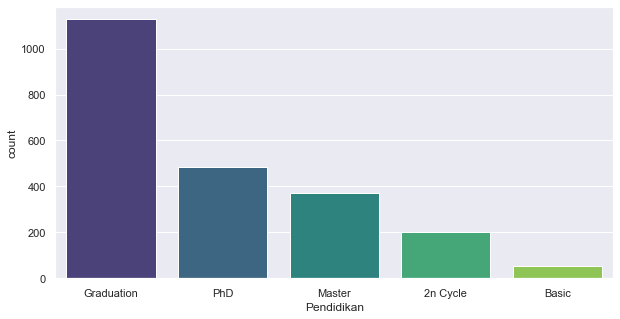

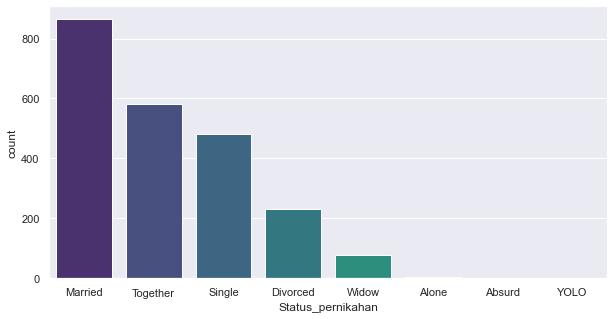

In [10]:
# Univariate Analysis
# kolom kategorik
for i in kategorik:
    plt.figure(figsize=(10,5))
    
    # urutkan data
    order = data[i].value_counts().sort_values(ascending=False).index
    
    # viualisasi
    sns.countplot(data = data_eda, x = data_eda[i], palette = 'viridis', order=order)
    plt.show()

**Terlihat dari grafik diatas bahwa kolom "Pendidikan" terdapat 5 nilai unik namun terdapat nilai yang inkonsisten artinya terdapat 2 nilai namun pengertianya sama. Begitu juga dengan kolom "Status_pernikahan" terdapat 8 nilai unik namun inkonsisten. Oleh karena itu, akna ditindaklanjuti untuk dihandling nilai-nilai inkonsisten pada tahap selanjutnya.**

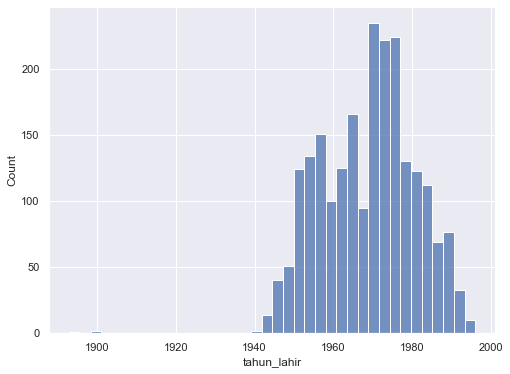

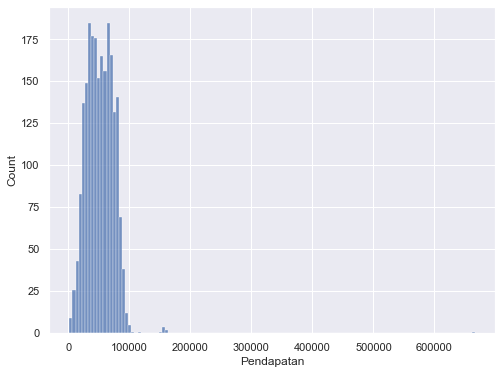

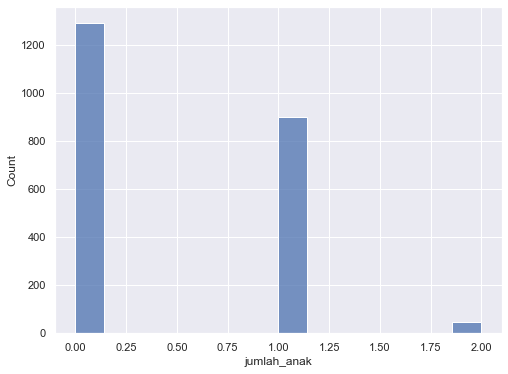

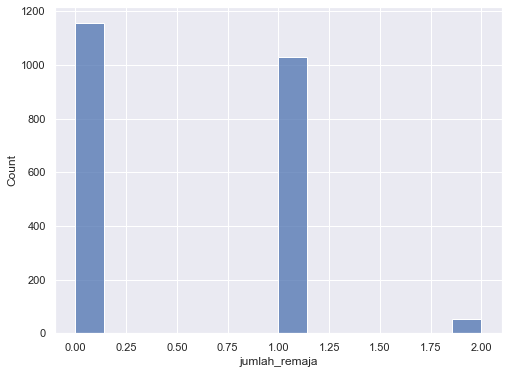

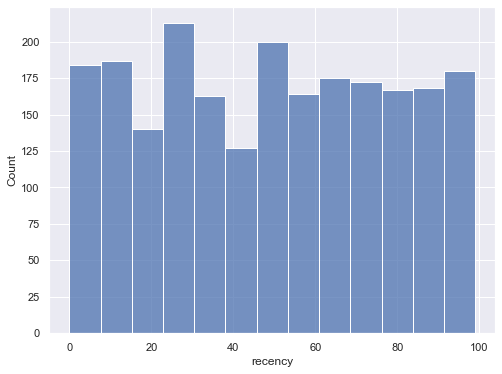

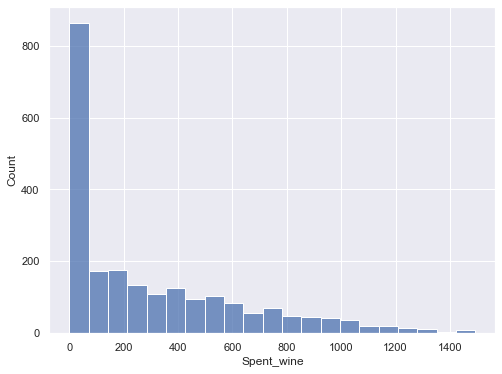

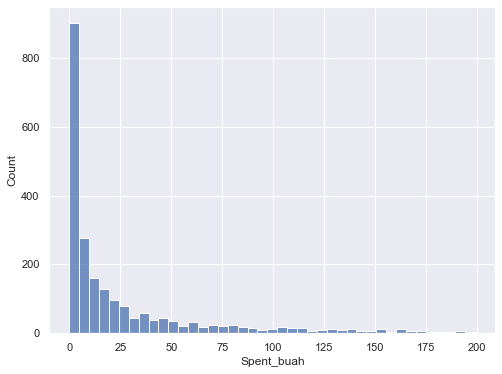

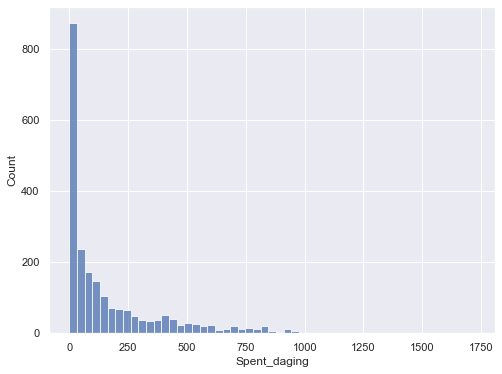

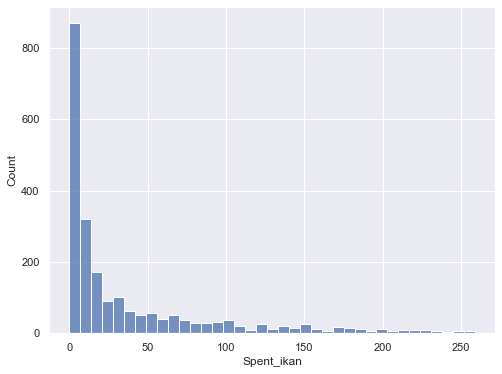

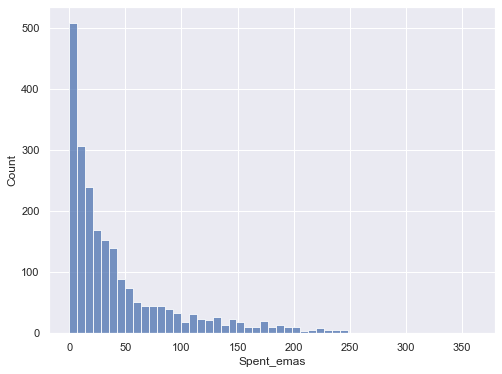

In [11]:
# Univariate Analysis
# kolom numerik
for i in numerik:
    plt.figure(figsize=(8,6))
    sns.histplot(data = data_eda, x=i)
    plt.show()

**Dari distribusi diatas bisa diambil informasi bahwa** <br>
**1. Kolom "tahun_lahir" memilki distribusi yang tidak normal atau distribusi negatif kemiringan kekiri.** <br>
**2. Kolom "Pendapatan", "Spent_wine", "Spent_buah", "Spent_daging", "Spent_ikan", "Spent_emas" memilki distribusi yang tidak normal atau distribusi positif kemiringan kekanan.** <br>
**3. Kolom "recency" memiliki distribusi uniform atau peluang munculnya hampir sama.** <br>
**4. Tindak lanjutnya adalah data akan dinormalisasi atau bisa juga mencari model yang robust terhadap distribusi tidak normal.**

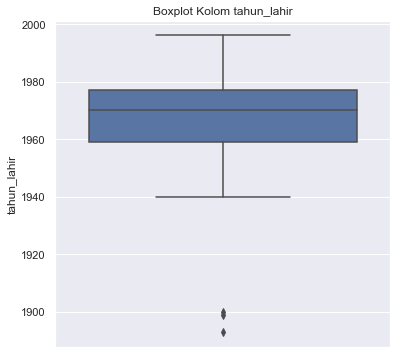

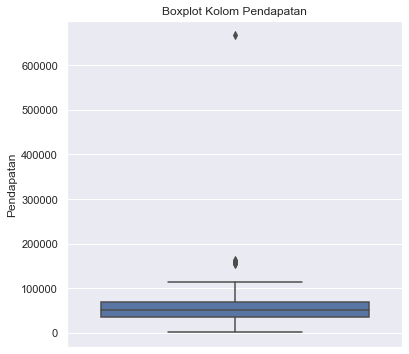

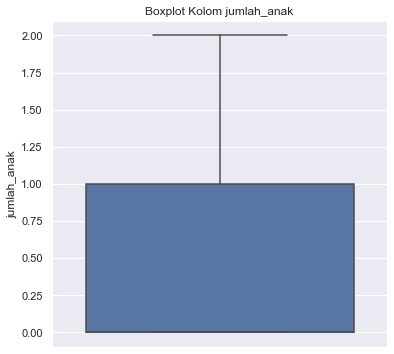

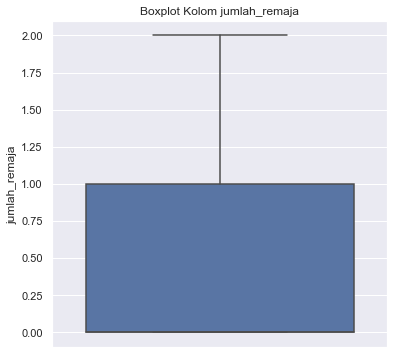

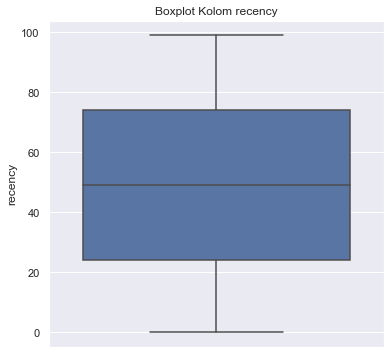

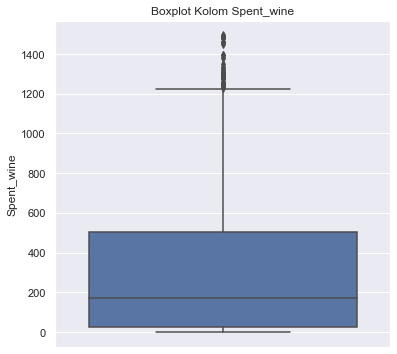

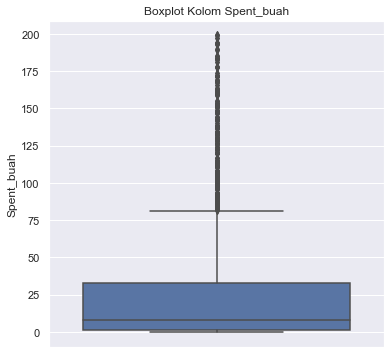

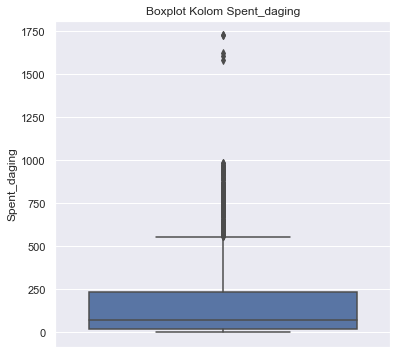

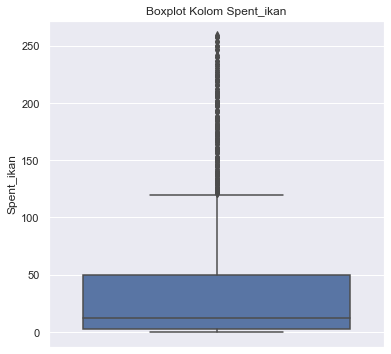

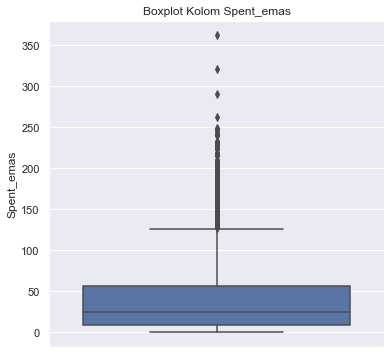

In [12]:
# Univariate Analysis
# kolom numerik
for i in numerik:
    plt.figure(figsize=(6,6))
    sns.boxplot(data = data_eda, y=i, orient = 'v')
    plt.title(f'Boxplot Kolom {i}')
    plt.show()

**Bisa kita lihat dari visualisasi diatas terdapat nilai outlier sehingga memengaruhi distribusi datanya. Oleh karena itu, tindak lanjutnya adalah berdiskusi dg stakeholder apkah nilai outliernya perlu untuk di hapus.**

### Bivariate Analysis

In [13]:
# perbaikan nilai inkonsisten
# kolom "Pendidikan"
for i in data_eda.index:
    if data_eda.loc[i,'Pendidikan'] == '2n Cycle':
        data_eda.loc[i,'Pendidikan'] = 'Master'
        
# kolom "Status_pernikahan"
for x in data_eda.index:
 if data_eda.loc[x, "Status_pernikahan"] == ('Absurd'):
    data_eda.loc[x, "Status_pernikahan"] = 'Single'
 elif data_eda.loc[x, "Status_pernikahan"] == ('YOLO'):
    data_eda.loc[x, "Status_pernikahan"] = 'Divorced'
 elif data_eda.loc[x, "Status_pernikahan"] == ('Together'):
    data_eda.loc[x, "Status_pernikahan"] = 'Married'
 elif data_eda.loc[x, "Status_pernikahan"] == ('Widow'):
    data_eda.loc[x, "Status_pernikahan"] = 'Divorced'
 elif data_eda.loc[x, "Status_pernikahan"] == ('Alone'):
    data_eda.loc[x, "Status_pernikahan"] = 'Single'

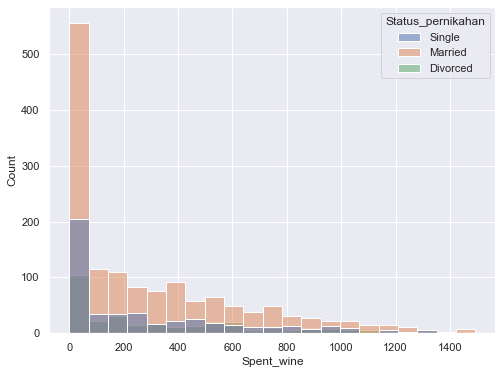

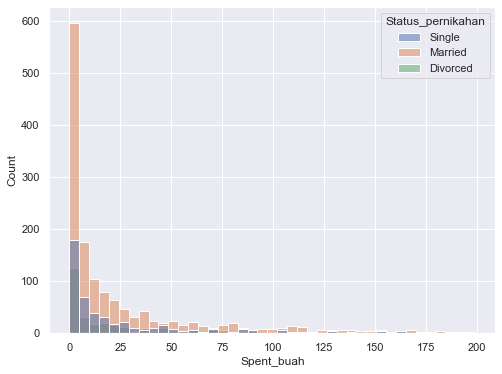

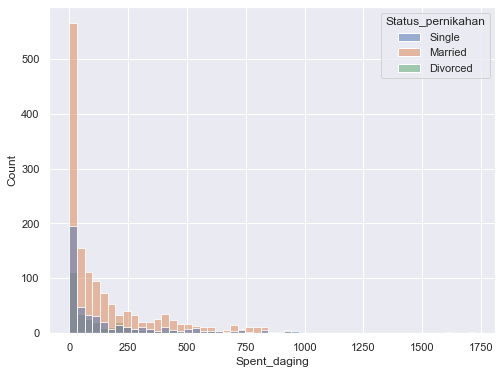

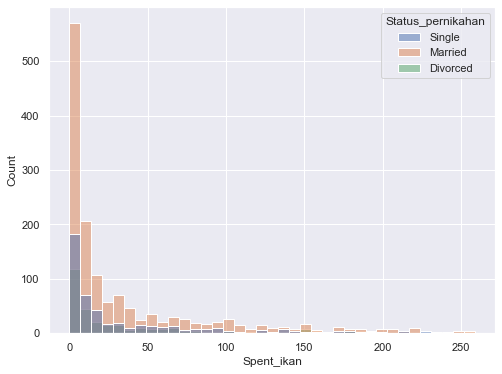

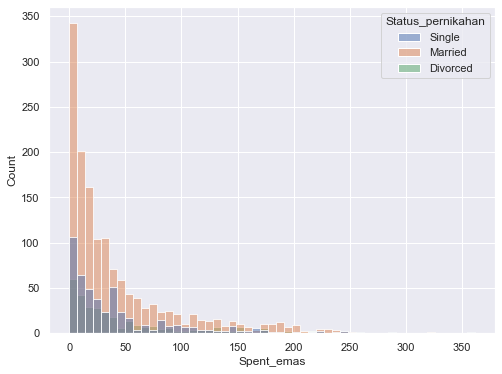

In [14]:
# Bivariate Analysis
# Visualisasi antara jumlah belanjaan berdasarkan status pernikahan
data_spent = data[['Spent_wine','Spent_buah','Spent_daging','Spent_ikan','Spent_emas']]

for i in data_spent:
    plt.figure(figsize=(8,6))
    sns.histplot(data=data_eda, x=i, hue=data_eda['Status_pernikahan'], color = 'viridis')
    plt.show()

**Bedasarkan visualisasi diatas customer dengan status pernikahan married memiliki jumlah atau total belanjaan tertinggi pada produk wine, buah, daging, ikan , dan emas dibanding customer single maupun divorced. Dan total belanjaan terendah terjadi pada customer dengan status pernikahan divorced** 

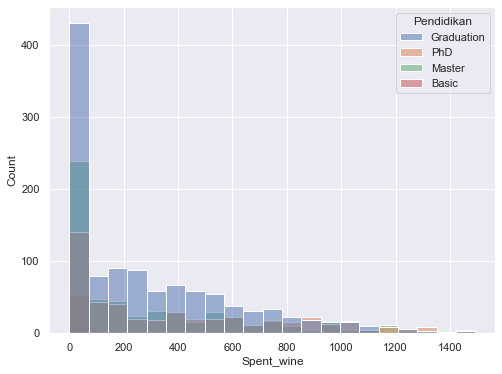

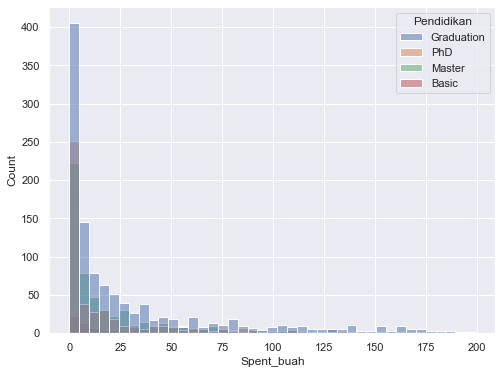

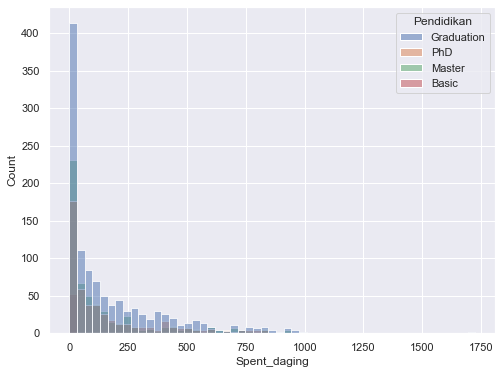

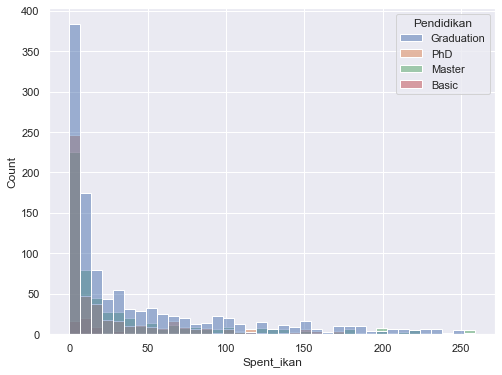

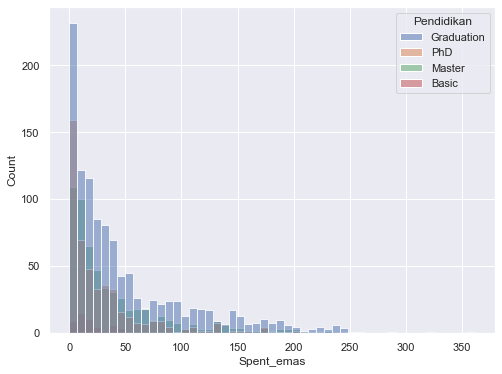

In [15]:
# Bivariate Analysis
# Visualisasi antara jumlah belanjaan berdasarkan status pendidikan
data_spent = data[['Spent_wine','Spent_buah','Spent_daging','Spent_ikan','Spent_emas']]

for i in data_spent:
    plt.figure(figsize=(8,6))
    sns.histplot(data=data_eda, x=i, hue=data_eda['Pendidikan'])
    plt.show()

**Bedasarkan visualisasi diatas customer dengan pendidikan graduation memiliki jumlah atau total belanjaan tertinggi pada produk wine, buah, daging, ikan , dan emas dibanding customer dengan pendidikan PhD, Master, dan Basic. Dan total belanjaan terendah terjadi pada customer dengan pendidikan basic** 

### Multivariate Analysis

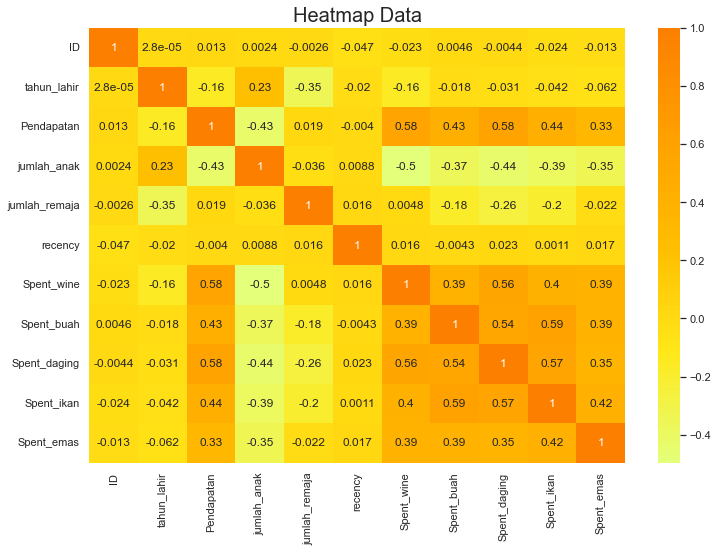

In [16]:
# Features Selection
plt.figure(figsize=(12,8))
sns.heatmap(data_eda.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

**Berdasarkan heatmap diatas, kolom "Pendapatan" memiliki nilai korelasi yang tinggi terhadap jumlah atau total belanjaan yang dihabiskan oleh customer pada produk wine, daging, ikan, buah, dan emas.**

# **Data Pre-Processing**

## Data Cleansing

In [17]:
# melihat data null
data_eda.isna().sum()

ID                      0
tahun_lahir             0
Pendidikan              0
Status_pernikahan       0
Pendapatan             24
jumlah_anak             0
jumlah_remaja           0
tanggal_pendaftaran     0
recency                 0
Spent_wine              0
Spent_buah              0
Spent_daging            0
Spent_ikan              0
Spent_emas              0
dtype: int64

In [18]:
# penambahan kolom total spent
data_eda['Total_spent'] = data_eda['Spent_wine'] + data_eda['Spent_buah'] + data_eda['Spent_daging'] + data_eda['Spent_ikan'] + data_eda['Spent_emas']

In [19]:
# handling data null pada kolom "Pendapatan"
q1 = np.percentile(data_eda['Pendapatan'], 25)
q2 = np.percentile(data_eda['Pendapatan'], 50)
q3 = np.percentile(data_eda['Pendapatan'], 75)

for i in data_eda.index:
    total_spent = data_eda.loc[i, 'Total_spent']
    
    if 5 <= total_spent <= 65:
        data_eda['Pendapatan'] = data_eda['Pendapatan'].fillna(np.median(data_eda.loc[:i, 'Pendapatan'][data_eda.loc[:i, 'Total_spent'] <= total_spent]))
    elif 65 < total_spent <= 400:
        data_eda['Pendapatan'] = data_eda['Pendapatan'].fillna(np.median(data_eda.loc[:i, 'Pendapatan'][(data_eda.loc[:i, 'Total_spent'] > 65) & (data_eda.loc[:i, 'Total_spent'] <= total_spent)]))
    elif 400 < total_spent <= 2000:
        data_eda['Pendapatan'] = data_eda['Pendapatan'].fillna(np.median(data_eda.loc[:i, 'Pendapatan'][(data_eda.loc[:i, 'Total_spent'] > 400) & (data_eda.loc[:i, 'Total_spent'] <= total_spent)]))

In [20]:
# cek kembali nilai null
data_eda.isna().sum()

ID                     0
tahun_lahir            0
Pendidikan             0
Status_pernikahan      0
Pendapatan             0
jumlah_anak            0
jumlah_remaja          0
tanggal_pendaftaran    0
recency                0
Spent_wine             0
Spent_buah             0
Spent_daging           0
Spent_ikan             0
Spent_emas             0
Total_spent            0
dtype: int64

## Outliers

In [21]:
# kolom tahun lahir
from scipy.stats.mstats import winsorize

data_eda['tahun_lahir'] = winsorize(data_eda['tahun_lahir'], limits=[0.05, 0.05])

In [22]:
# kolom pendapatan
from scipy.stats.mstats import winsorize
import numpy as np

# Misalkan 'Pendapatan' adalah kolom yang ingin di-winsorize
data_eda['Pendapatan'] = winsorize(np.array(data_eda['Pendapatan']), limits=[0.05, 0.05])

## Feature Extraction

In [23]:
# penambahan kolom umur
data_eda['Umur'] = (data_eda['tanggal_pendaftaran'].dt.year - data_eda['tahun_lahir']).astype('int')

# penambahan kolom jumlah_tanggungan
data_eda['Jumlah_tanggungan'] = data_eda['jumlah_anak'] + data_eda['jumlah_remaja']
data_eda.head()

# penambahan kolom generation
generation = {
    "Millennials": range(15, 40),
    "Gen X": range(40, 55),
    "Baby Boomers": range(55, 122)}

data_eda['Generation'] = data_eda['Umur'].apply(lambda x: next(
    (k for k, v in generation.items() if x in v), 'Other'))

data_eda.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Total_spent,Umur,Jumlah_tanggungan,Generation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,1529,55,0,Baby Boomers
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,6,26,60,2,Baby Boomers
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,42,755,48,0,Gen X
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,20,10,5,50,30,1,Millennials
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,15,395,33,1,Millennials


In [24]:
# penambahan kolom income_group
income_group = {
    "Low": (1500, 21000),
    "Medium": (21000, 50000),
    "High": (50000, float('inf'))}

data_eda['Income_group'] = data_eda['Pendapatan'].apply(lambda x: next(
    (k for k, v in income_group.items() if v[0] <= x < v[1]), 'Other'))

In [25]:
# mengcopy data eda
data_1 = data_eda.copy()

# hapus kolom yang tidak dibutuhkan
data_eda = data_eda.drop(columns=['tahun_lahir','jumlah_anak','jumlah_remaja', 'tanggal_pendaftaran', 'ID'], axis=1)
data_eda.sample(5)

,Pendidikan,Status_pernikahan,Pendapatan,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Total_spent,Umur,Jumlah_tanggungan,Generation,Income_group
2239,PhD,Married,52869.0,40,84,3,61,2,21,171,58,2,Baby Boomers,High
1692,PhD,Married,19107.0,40,9,0,5,0,7,21,28,1,Millennials,Low
2066,Graduation,Married,42192.0,40,40,15,15,17,7,94,63,0,Baby Boomers,Medium
926,Graduation,Married,77583.0,93,372,23,384,250,108,1137,36,0,Millennials,High
1499,Graduation,Married,68487.0,48,758,12,385,33,89,1277,25,0,Millennials,High


## Encoding

In [26]:
data_encod = data_eda.copy()
data_encod.head()

,Pendidikan,Status_pernikahan,Pendapatan,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Total_spent,Umur,Jumlah_tanggungan,Generation,Income_group
0,Graduation,Single,58138.0,58,635,88,546,172,88,1529,55,0,Baby Boomers,High
1,Graduation,Single,46344.0,38,11,1,6,2,6,26,60,2,Baby Boomers,Medium
2,Graduation,Married,71613.0,26,426,49,127,111,42,755,48,0,Gen X,High
3,Graduation,Married,26646.0,26,11,4,20,10,5,50,30,1,Millennials,Medium
4,PhD,Married,58293.0,94,173,43,118,46,15,395,33,1,Millennials,High


In [27]:
# mengganti nilai kategorik menjadi nilai numerik pada kolom "Pendidikan"
mapping = {'Basic' : 1,
           'Graduation' : 2,
           'Master' : 3,
           'PhD' : 4
}

# replace ke kolom "Pendidikan"
data_encod['Pendidikan'] = data_encod['Pendidikan'].map(mapping)

# replace ke kolom "Income_group"
data_encod['Income_group'] = data_encod['Income_group'].replace({'Low' : 1,
                                                            'Medium' : 2,
                                                            'High' : 3})

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# replace ke kolom "Status_pernikahan"
data_encod['Status_pernikahan'] = le.fit_transform(data_encod['Status_pernikahan'])

# replace ke kolom "Generation"
data_encod['Generation'] = le.fit_transform(data_encod['Generation'])

In [29]:
data_encod.head()

,Pendidikan,Status_pernikahan,Pendapatan,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Total_spent,Umur,Jumlah_tanggungan,Generation,Income_group
0,2,2,58138.0,58,635,88,546,172,88,1529,55,0,0,3
1,2,2,46344.0,38,11,1,6,2,6,26,60,2,0,2
2,2,1,71613.0,26,426,49,127,111,42,755,48,0,1,3
3,2,1,26646.0,26,11,4,20,10,5,50,30,1,2,2
4,4,1,58293.0,94,173,43,118,46,15,395,33,1,2,3


## Scaling

In [30]:
data_norm = data_encod[['Pendapatan', 'recency', 'Spent_wine', 'Spent_buah', 'Spent_daging', 
                      'Spent_ikan', 'Spent_emas', 'Umur', 'Total_spent']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the specified columns
data_norm_scaled = scaler.fit_transform(data_norm)

# Assign the scaled values back to the original DataFrame
data_encod[['Pendapatan','recency','Spent_wine','Spent_buah','Spent_daging','Spent_ikan','Spent_emas','Umur','Total_spent']] = data_norm_scaled

In [31]:
data_encod.head()

,Pendidikan,Status_pernikahan,Pendapatan,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Total_spent,Umur,Jumlah_tanggungan,Generation,Income_group
0,2,2,0.321815,0.307039,0.983781,1.551577,1.679702,2.462147,0.843207,1.643585,0.966183,0,0,3
1,2,2,-0.278506,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.729006,-0.956015,1.410095,2,0,2
2,2,1,1.007699,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.038766,0.304869,0.344706,0,1,3
3,2,1,-1.281143,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.748179,-0.914505,-1.253378,1,2,2
4,4,1,0.329704,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.556446,-0.317790,-0.987031,1,2,3


# **Modeling**

In [32]:
data_model = data_encod.copy()
data_model.head()

,Pendidikan,Status_pernikahan,Pendapatan,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Total_spent,Umur,Jumlah_tanggungan,Generation,Income_group
0,2,2,0.321815,0.307039,0.983781,1.551577,1.679702,2.462147,0.843207,1.643585,0.966183,0,0,3
1,2,2,-0.278506,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.729006,-0.956015,1.410095,2,0,2
2,2,1,1.007699,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.038766,0.304869,0.344706,0,1,3
3,2,1,-1.281143,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.748179,-0.914505,-1.253378,1,2,2
4,4,1,0.329704,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.556446,-0.317790,-0.987031,1,2,3


## Menentukan n Cluster

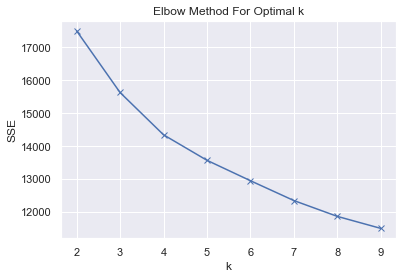

In [33]:
# import library
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data 
# Selanjutkan akan dicari SSE
Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_model)
    Sum_of_squared_error.append(km.inertia_)
    
# Visualisasi
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

**Berdasarkan metode elbow pada titik siku-siku diperoleh di k=2 atau k=3, dalam pengaplikasian metode elbow pemilihan k optimal dipilih ketika jarak antara jumlah 1 dan yang lain tidak berbeda secara signifikan. Pada kasus ini nilai k yang optimal adalah 2. Namun untuk memastikan, akan dievaluasi dengan menggunakan silhouette score.**

In [34]:
# Silhouette Score
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(data_model)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data_model, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3141177826687824
For n_clusters = 3, silhouette score is 0.18433339419875877
For n_clusters = 4, silhouette score is 0.15017980014495688
For n_clusters = 5, silhouette score is 0.14773455496381835
For n_clusters = 6, silhouette score is 0.1500833549756934
For n_clusters = 7, silhouette score is 0.12957715444718382
For n_clusters = 8, silhouette score is 0.13188553547370105
For n_clusters = 9, silhouette score is 0.1339246204648703


**Silhouette Score adalah metrik evaluasi clustering yang digunakan untuk menentukan seberapa baik suatu objek berada dalam cluster yang sesuai dengannya dibandingkan dengan cluster lainnya. Skor Silhouette berkisar dari -1 hingga 1, dan semakin tinggi skor Silhouette, semakin baik pembagian clustering. Oleh karena itu, pada kasus ini Silhouette Score terbaik terjadi pada n_cluster = 2**

## Model Clustering Kmeans

In [35]:
# import library
from sklearn.cluster import KMeans

# memodelkan data dengan KMeans
cluster = KMeans(n_clusters=2)
cluster.fit(data_model)

# membuat kolom baru 
segment = pd.Series(cluster.labels_,name='Segment')

# hasil 
data_result = pd.concat([data_1, segment], axis=1)
data_result.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Total_spent,Umur,Jumlah_tanggungan,Generation,Income_group,Segment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,1529,55,0,Baby Boomers,High,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,6,26,60,2,Baby Boomers,Medium,1
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,42,755,48,0,Gen X,High,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,20,10,5,50,30,1,Millennials,Medium,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,15,395,33,1,Millennials,High,1


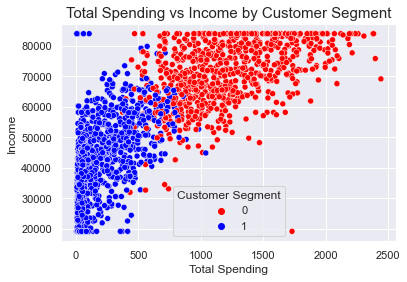

In [36]:
# plot total belanja customer berdasarkan pendapatan
# Assuming 'Segment' is a column in your DataFrame
sns.scatterplot(x='Total_spent', y='Pendapatan', hue='Segment', data=data_result, palette=['red', 'blue'])
plt.legend(title='Customer Segment')
plt.title('Total Spending vs Income by Customer Segment', fontsize=15)
plt.xlabel('Total Spending')
plt.ylabel('Income')
plt.show()

# **Exploratory Data Analysis**

In [37]:
# memisahkan kelompok segment 0 dengan kelompok segment 1
segment_0 = data_result[data_result['Segment']==0] # kelompok segment 0
segment_1 = data_result[data_result['Segment']==1] # kelompok segment 1

print('Jumlah customer pada kelompok segment 0:',segment_0['ID'].shape[0])
print('Jumlah customer pada kelompok segment 1:',segment_1['ID'].shape[0])

Jumlah customer pada kelompok segment 0: 844
Jumlah customer pada kelompok segment 1: 1396


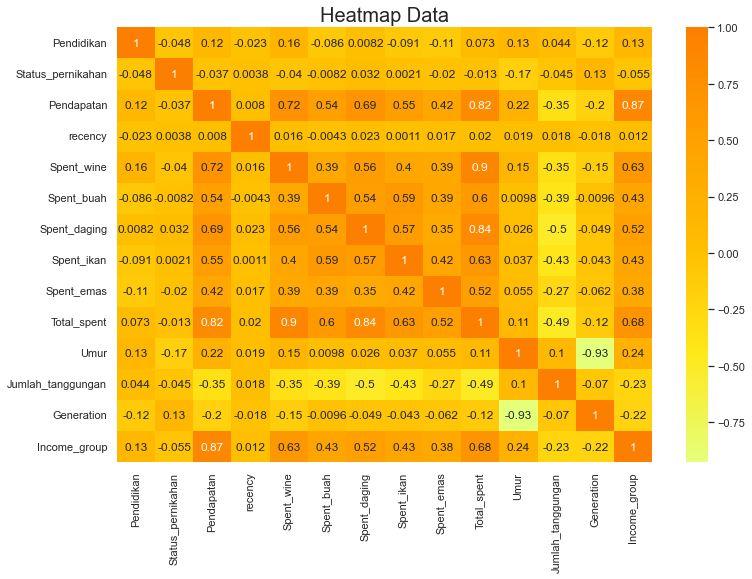

In [46]:
# Multivariate Analysis
# Features Selection
plt.figure(figsize=(12,8))
sns.heatmap(data_encod.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

## Kelompok Customer pada Segment 0

In [39]:
segment_0.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Total_spent,Umur,Jumlah_tanggungan,Generation,Income_group,Segment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,1529,55,0,Baby Boomers,High,0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,42,755,48,0,Gen X,High,0
12,2125,1959,Graduation,Divorced,63033.0,0,0,2013-11-15,82,194,61,480,225,30,990,54,0,Gen X,High,0
15,2114,1950,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,45,1247,62,0,Baby Boomers,High,0
18,6565,1950,Master,Married,76995.0,0,1,2013-03-28,91,1012,80,498,0,176,1766,63,1,Baby Boomers,High,0


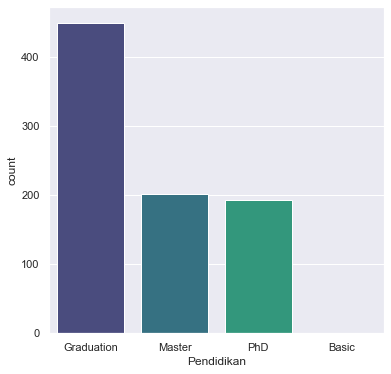

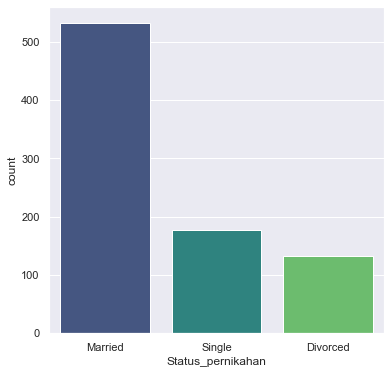

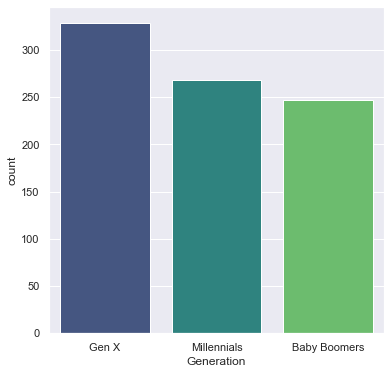

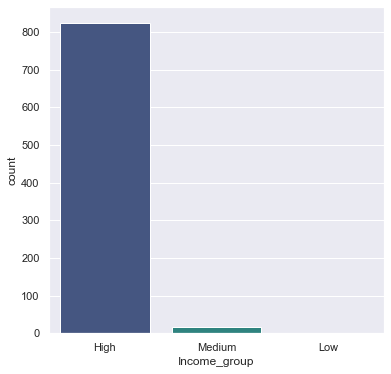

In [40]:
kategorik = [i for i in segment_0.select_dtypes(include='object').columns.tolist()]

for i in kategorik:
    plt.figure(figsize=(6,6))
    sort = segment_0[i].value_counts().sort_values(ascending=False).index
    sns.countplot(data= segment_0, x= segment_0[i], order = sort, palette='viridis')
    plt.show()

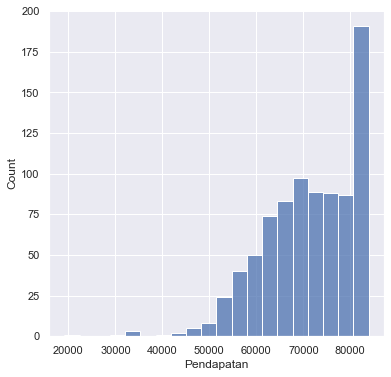

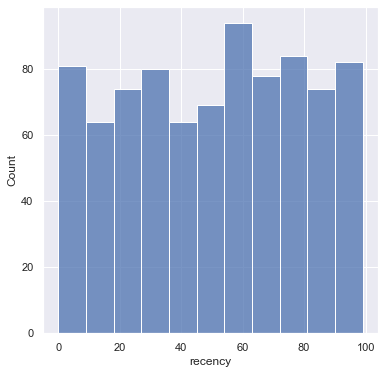

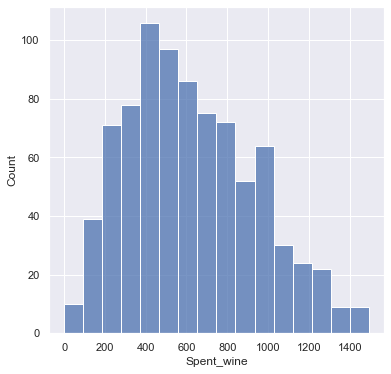

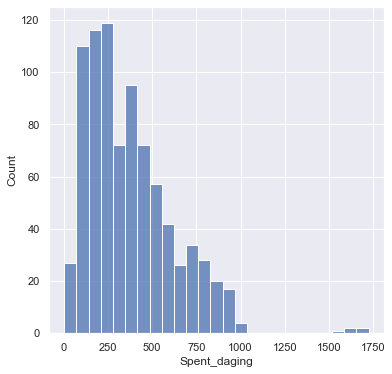

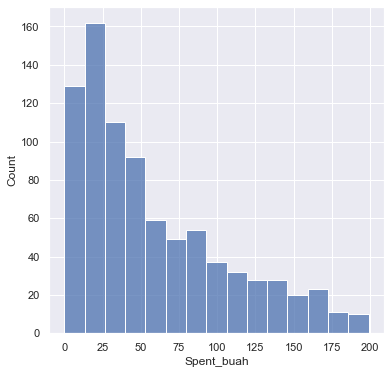

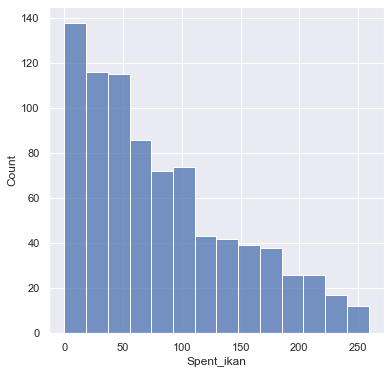

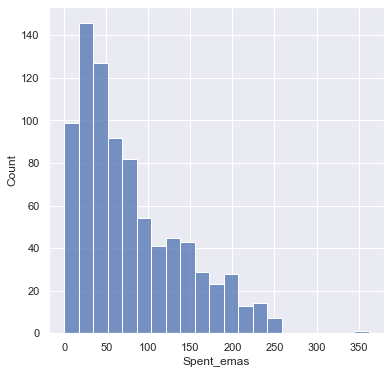

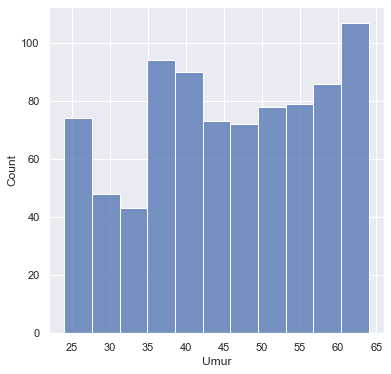

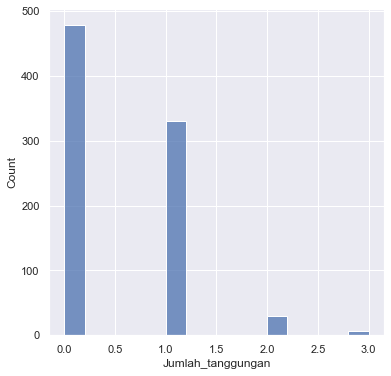

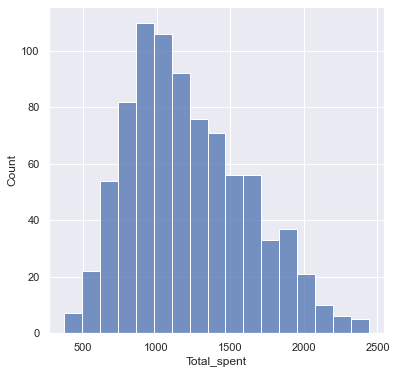

In [41]:
numerik = segment_0[['Pendapatan','recency','Spent_wine','Spent_daging','Spent_buah','Spent_ikan','Spent_emas','Umur',
                      'Jumlah_tanggungan','Total_spent']]

for i in numerik:
    plt.figure(figsize=(6,6))
    sns.histplot(data= segment_0, x= segment_0[i], palette='viridis')
    plt.show()

## Kelompok Customer pada Segment 1

In [42]:
segment_1.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,Total_spent,Umur,Jumlah_tanggungan,Generation,Income_group,Segment
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,6,26,60,2,Baby Boomers,Medium,1
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,4,20,10,5,50,30,1,Millennials,Medium,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,15,395,33,1,Millennials,High,1
5,7446,1967,Master,Married,62513.0,0,1,2013-09-09,16,520,42,98,0,14,674,46,1,Gen X,High,1
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,27,541,41,1,Gen X,High,1


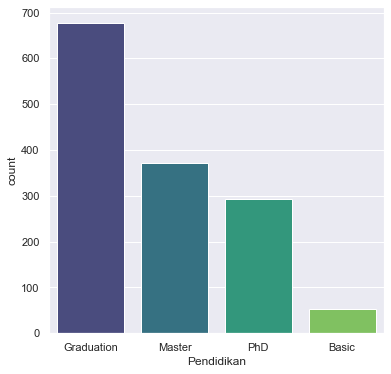

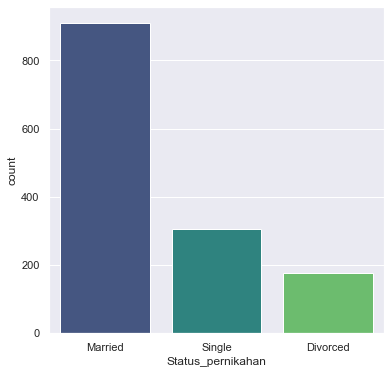

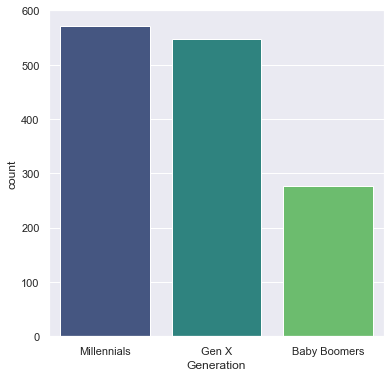

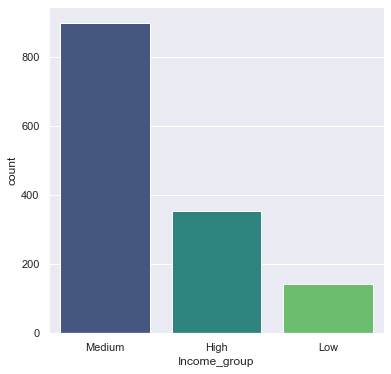

In [43]:
kategorik = [i for i in segment_1.select_dtypes(include='object').columns.tolist()]

for i in kategorik:
    plt.figure(figsize=(6,6))
    sort = segment_1[i].value_counts().sort_values(ascending=False).index
    sns.countplot(data= segment_1, x= segment_1[i], order = sort, palette='viridis')
    plt.show()

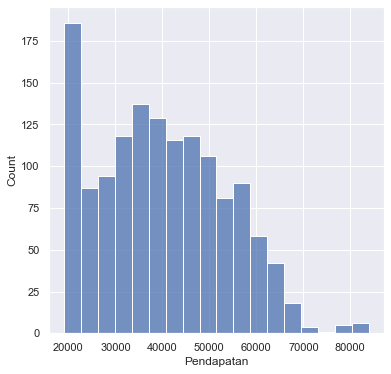

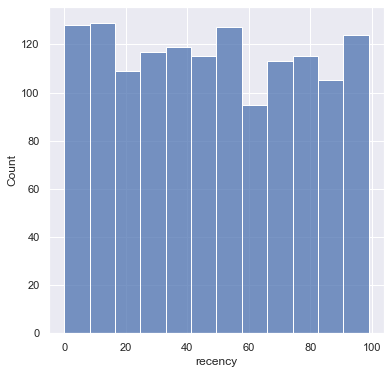

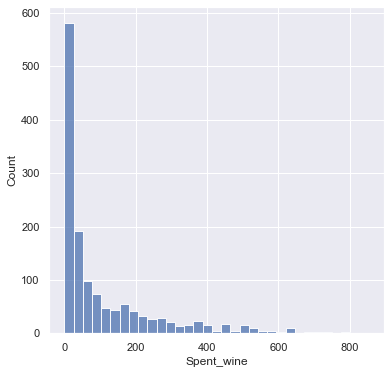

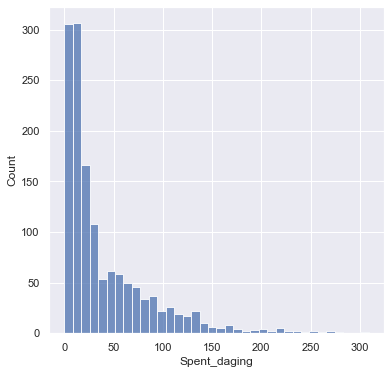

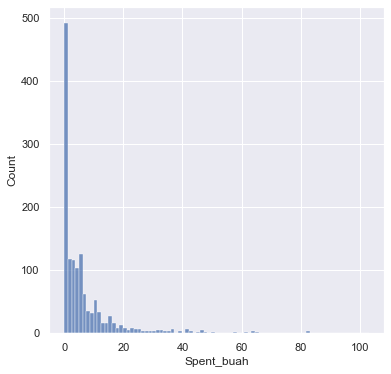

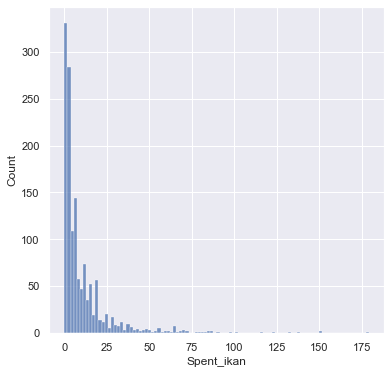

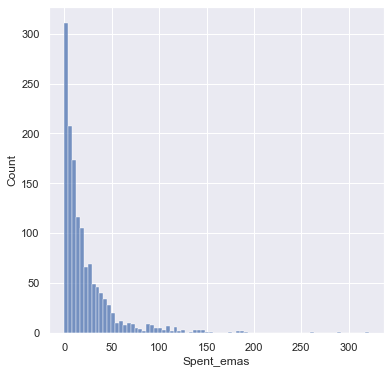

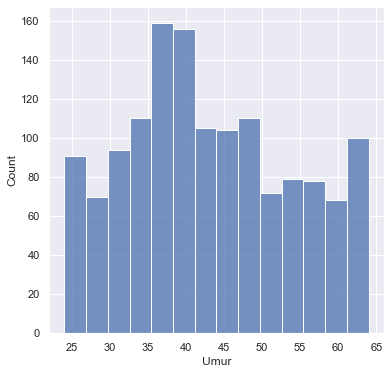

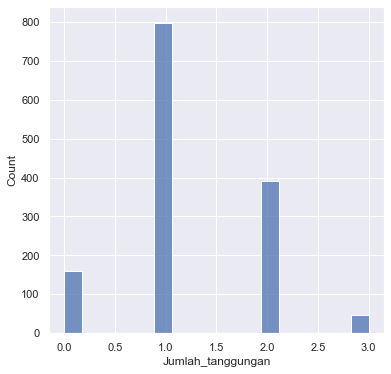

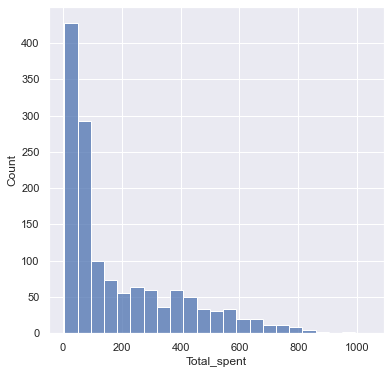

In [44]:
numerik = segment_1[['Pendapatan','recency','Spent_wine','Spent_daging','Spent_buah','Spent_ikan','Spent_emas','Umur',
                      'Jumlah_tanggungan','Total_spent']]

for i in numerik:
    plt.figure(figsize=(6,6))
    sns.histplot(data= segment_1, x= segment_1[i], palette='viridis')
    plt.show()

# **Ekspor Data**

In [45]:
# Menyimpan ke Excel
data_result.to_excel('data_fix.xlsx', index=False)

# **Suggestion and Recommendation**

## Kesimpulan

1. Target campaign memiliki jumlah customer yang lebih sedikit yaitu 843 customer
2. Target campaign merupakan customer yang memiliki pendapatan lebih tinggi dari pada customer yang tidak ditarget dengan rata-rata sebesar 72,228
3. Target campaign meruapakan generasi millennials dan Gen X
4. Target campaign merupakan customer dengan jumlah tanggungan yang lebih sedikit
5. 63% target campaign merupakan customer yang telah menikah
6. Karateristik dari tiap-tiap produk memiliki kesamaan profile customer

## Rekomendasi

1. Target campaign merupakan customer yang memiliki pendapatan tinggi sehingga tidak mengapa apabila campaign dilakukan dengan sistem promosi yang tinggi pula
2. Target campaign merupakan customer dari generasi millennials dan Gen X, sehingga perlu mempertimbangkan sistem promosi menggunakan social media branding
3. Target customer memiliki karakteristik yang sama pada tiap-tiap product market, sehingga campaign tidak harus dibatasi satu product saja, namun campaign bisa dilakukan bebrapa product sekaligus.